torch.Size([256, 256])


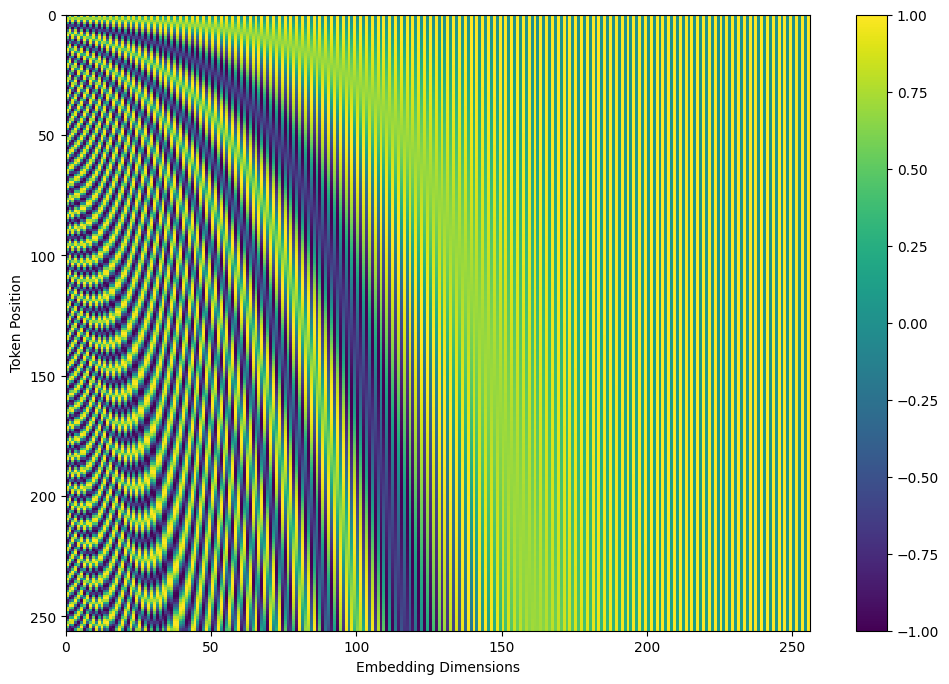

In [1]:
import torch
import matplotlib.pyplot as plt
import Project_Model.Libs.Embedder as Embedder

TOKENS = 256
DIMENSIONS = 256

# Custom code made by Christian Risi and Giuseppe Gassi
TENSOR = Embedder.fixed_positional_encoding(TOKENS, DIMENSIONS)
# print(TENSOR)


# Code taken from
#   https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb
#   to test for correctness of custom code
print (TENSOR.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(TENSOR, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, DIMENSIONS))
plt.ylim((TOKENS,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

[7706, 290, 756, 4270, 7357, 115, 351, 1507, 1213, 410, 3382, 317, 497, 4740, 2784, 7700]
16
torch.Size([16, 256])
tensor([[-0.4328,  0.2221,  0.0101,  ...,  0.8186, -0.3063,  0.1974],
        [ 0.1821, -0.0650,  2.6001,  ...,  1.2106, -0.0669,  1.9826],
        [ 2.0355, -0.6010,  1.0185,  ...,  0.2779, -0.1062,  0.8631],
        ...,
        [ 1.3615,  0.0708,  0.2655,  ..., -0.3767, -0.3460,  1.4408],
        [-0.4671, -0.8220,  2.1557,  ...,  1.6037, -1.0323,  0.8597],
        [ 0.4647, -0.7747,  2.5598,  ...,  0.6946,  0.4063,  2.0707]],
       grad_fn=<AddBackward0>)


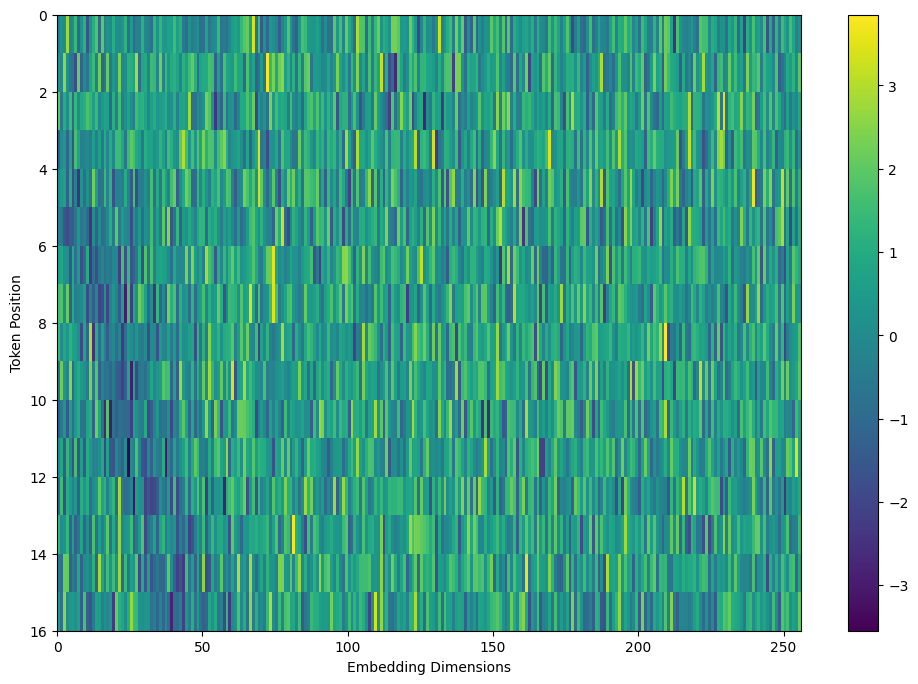

In [9]:
from pathlib import Path
import Project_Model.Libs.BPE as BPE

TEXT = "<ABS>The Dark Knight is a 2008 superhero film directed by Christopher Nolan,<SOTL>"

VOCABULARY_PATH = Path("Assets/Model/toy_10/toy_dictionary.json")
SPECIAL_VOC = BPE.default_special_tokens()

VOCABULARY = BPE.load_nanos_vocabulary(VOCABULARY_PATH)
TOKENANO = BPE.TokeNanoCore(
    VOCABULARY,
    SPECIAL_VOC
)

TOKENIZATION = TOKENANO.encode(TEXT)
print(TOKENIZATION)

TOKEN_SPACE_SIZE = TOKENANO.vocabulary_size
EMBEDDED_SIZE = 256

EMBEDDER = Embedder.NanoSocratesEmbedder(TOKEN_SPACE_SIZE, EMBEDDED_SIZE)
TENSOR: torch.Tensor = EMBEDDER(TOKENIZATION)
print(len(TOKENIZATION))
print(TENSOR.shape)

print(TENSOR)

TOKENS, DIMENSIONS = TENSOR.shape

plt.figure(figsize=(12,8))
plt.pcolormesh(TENSOR.detach().numpy(), cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, DIMENSIONS))
plt.ylim((TOKENS,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()
